# Python Stereonet Generator (Jupyter Notebook)

This notebook generates a single stereonet from a CSV file with Azimuth and Dip columns, fully compatible with FieldMove Clino app data.

In [1]:
# Install mplstereonet
!pip install mplstereonet

import pandas as pd
import matplotlib.pyplot as plt
import mplstereonet

Your CSV file should be formatted like this:

```csv
Azimuth  Dip
017      087
033      087
325      087
346      087
014      089
```

In [2]:
# Loading and reading the CSV file
csv_path = input("Please copy csv path here: ")
df = pd.read_csv(csv_path)

# Reading each column as a variable
azimuth = df["Azimuth"]
dip = df["Dip"]

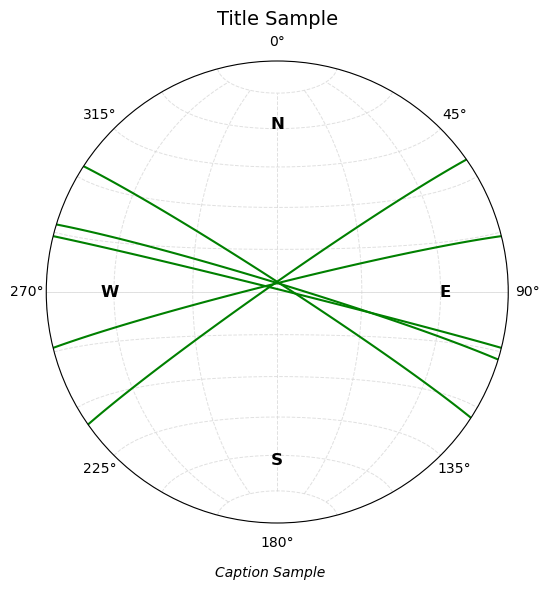

In [3]:
# Building and displaying the stereonet
# This is the blank canvas of the stereonet itself, therefore we only need one.
fig = plt.figure(figsize=(6, 6))

# Eventually, the option to generate numerous stereonets at once will be available.
ax = fig.add_subplot(111, projection='stereonet')

# This displays a grid system 
ax.grid(True, color="lightgray", linestyle="--", linewidth=0.7, alpha=0.7)

# This shows the N, E, S, W values to orientate the viewer
ax.text(0, 1.08, "N", ha="center", va="center", fontsize=12, fontweight="bold")
ax.text(1.08, 0, "E", ha="center", va="center", fontsize=12, fontweight="bold")
ax.text(0, -1.08, "S", ha="center", va="center", fontsize=12, fontweight="bold")
ax.text(-1.08, 0, "W", ha="center", va="center", fontsize=12, fontweight="bold")


# This takes the csv file and plots it onto the stereonet
for _, row in df.iterrows():

    strike = (row["Azimuth"] - 90) % 360 # This calculates strike from azimuth
    dip = (row["Dip"])

    ax.plane(strike, dip, color="green", linestyle="-")
    # Add in a HEX code or colour name to change the colour of the stereonet planes.


# Optionally add a title and a caption
# The title displays at the top of the stereonet
title = input("Please input a title (optional): ")
if title:
    ax.set_title(title, ha="center", va="center", fontsize=14, pad=30)

# The caption displays at the bottom of the stereonet in italics
caption = input("Please input a caption (optional): ")
if caption:
    fig.text(0.5, 0.02, caption, ha="center", fontsize=10, style="italic")

plt.show()